In [12]:
import folium

print(folium.__file__)
print(folium.__version__)


C:\ProgramData\Anaconda3\lib\site-packages\folium\__init__.py
0.6.0


In [13]:
import numpy as np
import pandas as pd
import numpy.ma as ma


def make_data():
    x = np.linspace(-np.pi, np.pi, 101)
    sin = np.sin(x)
    cos = np.cos(x)
    cos[20:50] = np.NaN
    return pd.DataFrame(np.asanyarray([sin, cos]).T, columns=['sin', 'cos'], index=x)

df = make_data()
resolution, width, height = 75, 7, 3

In [14]:
station = '42'
lon, lat = -42, -21
mapa = folium.Map(location=[lat, lon], zoom_start=5)

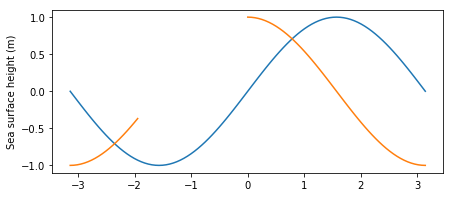

In [15]:
import base64
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(width, height))
ax = df.plot(ax=ax, legend=False)
ax.set_ylabel('Sea surface height (m)')
png = 'mpld3_{}.png'.format(station)
fig.savefig(png, dpi=resolution)

encoded = base64.b64encode(open(png, 'rb').read()).decode()

In [16]:
from folium import IFrame

html = '<img src="data:image/png;base64,{}">'.format
iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
popup = folium.Popup(iframe, max_width=2650)

icon = folium.Icon(color="red", icon="ok")
marker = folium.Marker(location=[lat-2, lon-1], popup=popup, icon=icon)
mapa.add_child(marker);

In [18]:
encoded = base64.b64encode(open('ctd.jpg', 'rb').read()).decode()

html = '<img src="data:image/jpeg;base64,{}">'.format
iframe = IFrame(html(encoded), width=632+20, height=420+20)
popup = folium.Popup(iframe, max_width=2650)

icon = folium.Icon(color="blue", icon="ok")
marker = folium.Marker(location=[lat-2, lon+1], popup=popup, icon=icon)
mapa.add_child(marker);

In [21]:
mapa
mapa.save('./out/map6.html')
